In [1]:
%load_ext autoreload
%autoreload 2
# no need to restart jupyter notebook if you make changes in the module

utility functions

In [2]:
EMPTY = 0
STONE = 1
APPLE = 2
GRASS = 3

import random
import numpy as np

def generate_map(size: int, chance_show_up: float, val_range: list):
    """
    Generates a size x size numpy array with mostly 0s. Each element has a chance_show_up probability
    of being a nonzero value randomly chosen from val_range.
    
    :param size: Size of the square matrix (size x size)
    :param chance_show_up: Probability of an element being nonzero
    :param val_range: List of possible nonzero values
    :return: A numpy array of shape (size, size)
    """
    # Initialize a size x size array of zeros
    matrix = np.zeros((size, size), dtype=int)
    
    # Generate a mask where elements should be replaced with nonzero values
    mask = np.random.rand(size, size) < chance_show_up
    
    # Generate random values from val_range for the selected positions
    non_zero_values = np.random.choice(val_range, size=mask.sum())
    # Assign nonzero values to the matrix
    matrix[mask] = non_zero_values
    
    return matrix

# Example usage
np.random.seed(4)  # Set seed for reproducibility
print(generate_map(10, 0.1, [1, 2]))


[[0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 2 0 2 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


To compare algorithm, we should visualze among different map size and different probability (using a heatmap)


In [12]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def compare_algorithm(brute_algo, our_algo, problem_id, num_experiments = 5):
    np.random.seed(4)  # Set seed for reproducibility
    if problem_id == 1:
        vals_range = [STONE]
    elif problem_id == 2:
        vals_range = [STONE, APPLE]
    elif problem_id == 3:
        vals_range = [STONE, APPLE, GRASS]
    
    # Define the probabilities and their labels
    prob_settings = [(0.01, "Low"), (0.05, "High")]
    initial_h_values = [1, 10, 100]
    size_range = range(1, 11)
      # Number of repetitions for each configuration
    
    # Create one large figure to hold all comparisons
    fig = plt.figure(figsize=(15, 20))
    gs = GridSpec(len(initial_h_values), len(prob_settings), figure=fig)
    
    # For each initial_h value (will be displayed as rows)
    for row, initial_h in enumerate(initial_h_values):
        # For each probability setting (will be displayed as columns)
        for col, (prob, prob_type) in enumerate(prob_settings):
            brute_algo_times = []
            our_algo_times = []
            
            # Run experiments for different matrix sizes
            for size in size_range:
                brute_times_for_size = []
                our_times_for_size = []
                
                # Run each experiment multiple times and collect results
                for _ in range(num_experiments):
                    matrix = generate_map(size, prob, vals_range)
                    start_point = [size//2, size//2]
                    
                    # Time brute force algorithm
                    time0 = time.time()
                    brute_result = brute_algo(matrix, start_point, initial_h)
                    time1 = time.time()
                    brute_times_for_size.append(time1 - time0)
                    
                    # Time our algorithm
                    our_result = our_algo(matrix, start_point, initial_h)
                    time2 = time.time()
                    our_times_for_size.append(time2 - time1)
                    
                    # Verify correctness
                    if brute_result != our_result:
                        print(f"Failed for prob={prob}, size={size}, initial_h={initial_h}")
                        print(f"Brute Force: {brute_result}")
                        print(f"Our Algorithm: {our_result}")
                
                # Calculate averages for this size
                brute_algo_times.append(np.mean(brute_times_for_size))
                our_algo_times.append(np.mean(our_times_for_size))
            
            # Create subplot for this combination of initial_h and probability
            ax = fig.add_subplot(gs[row, col])
            ax.plot(size_range, brute_algo_times, 'o-', label="Brute Force")
            ax.plot(size_range, our_algo_times, 's-', label="Our Algorithm")
            ax.set_xlabel("Matrix Size")
            
            # Only add y-label for the first column
            if col == 0:
                ax.set_ylabel("Time (seconds)")
            
            # Add row and column headers
            title = ""
            if row == 0:
                title += (f"{prob_type} Probability ({prob})\n")
            title += f"Initial h ({initial_h})"
            ax.set_title(title)
            
            # Add initial_h label on the right side of the last column
            if col == len(prob_settings) - 1:
                ax_right = ax.twinx()
                ax_right.set_ylabel(f"h = {initial_h}", rotation=270, labelpad=15)
                ax_right.set_yticks([])
            
            # Add legend to every subplot
            ax.legend(loc='upper left', fontsize='small')
            
            ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.suptitle(f"Algorithm Comparison (Average of {num_experiments} Runs)", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

In [13]:
from p1 import algo_brute_p1, algo_p1
# matrix = generate_map(10, 0.05, [1])
# algo_brute_p1(matrix, [0,0], 5)

Failed for prob=0.01, size=1, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=1, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=1, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=2, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=2, initial_h=1
Brute Force: 1
Our Algorithm: None
Failed for prob=0.01, size=2, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=3, initial_h=1
Brute Force: 1
Our Algorithm: None
Failed for prob=0.01, size=3, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=3, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=4, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=4, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=4, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=5, initial_h=1
Brute Force: 0
Our Algorithm: None

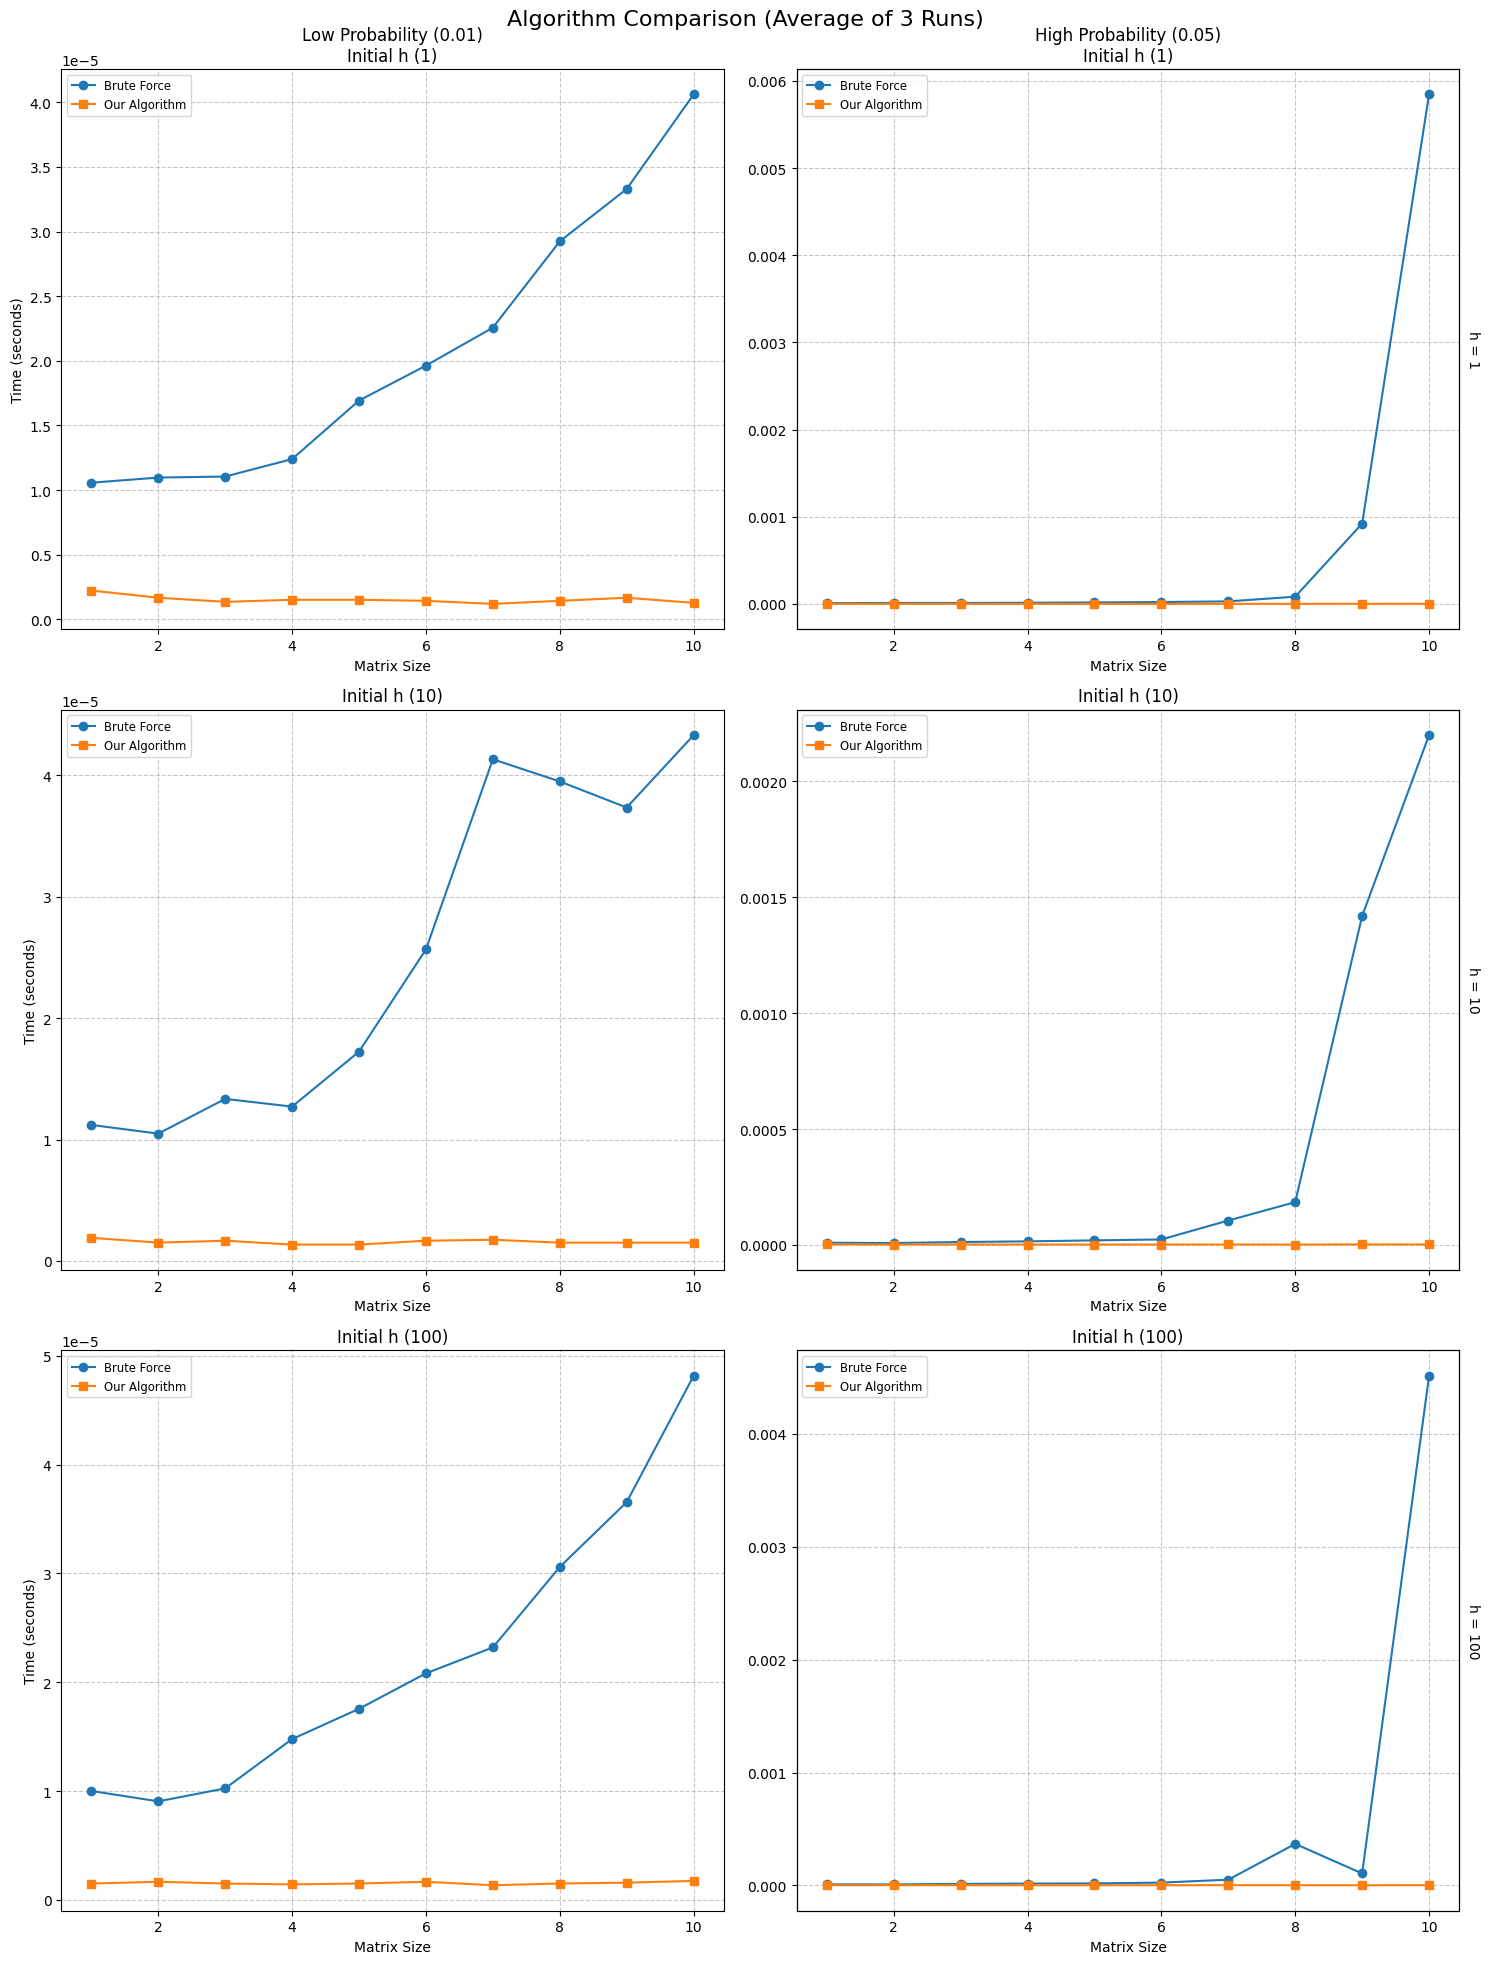

In [14]:
compare_algorithm(algo_brute_p1, algo_p1, problem_id=1, num_experiments=3)

Failed for prob=0.01, size=1, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=1, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=1, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=2, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=2, initial_h=1
Brute Force: 1
Our Algorithm: None
Failed for prob=0.01, size=2, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=3, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=3, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=3, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=4, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=4, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=4, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=5, initial_h=1
Brute Force: 1
Our Algorithm: None

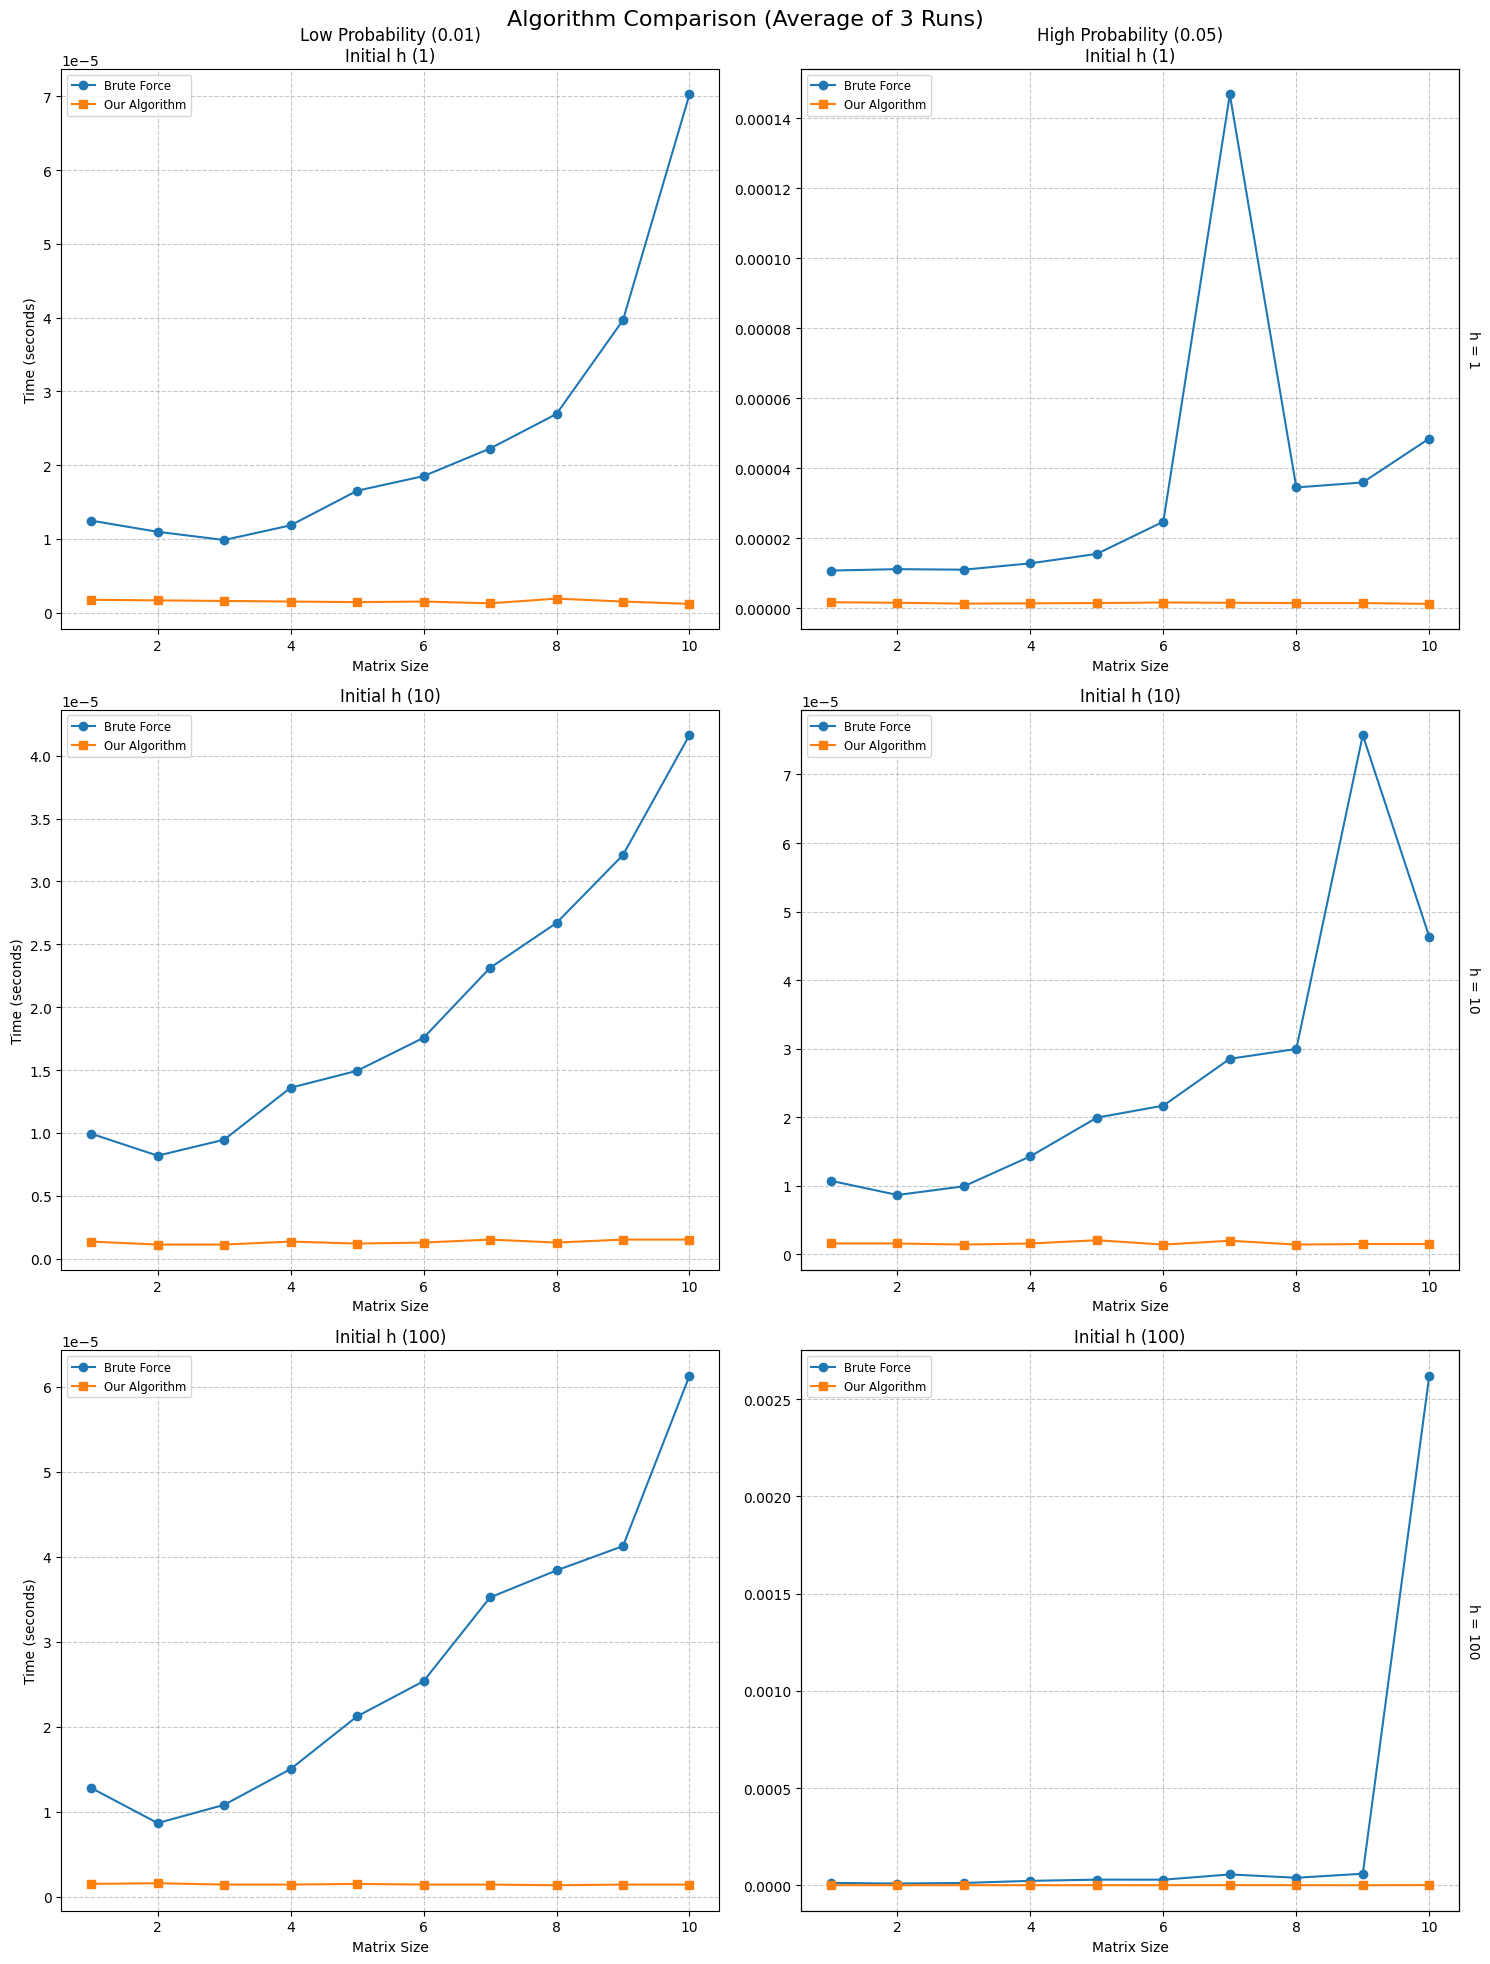

In [15]:
from p2 import algo_brute_p2, algo_p2

compare_algorithm(algo_brute_p2, algo_p2, problem_id=2, num_experiments=3)

In [10]:
from p3 import algo_brute_p3, algo_p3


Failed for prob=0.01, size=1, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=1, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=1, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=2, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=2, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=2, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=3, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=3, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=3, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=4, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=4, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=4, initial_h=1
Brute Force: 0
Our Algorithm: None
Failed for prob=0.01, size=5, initial_h=1
Brute Force: 0
Our Algorithm: None

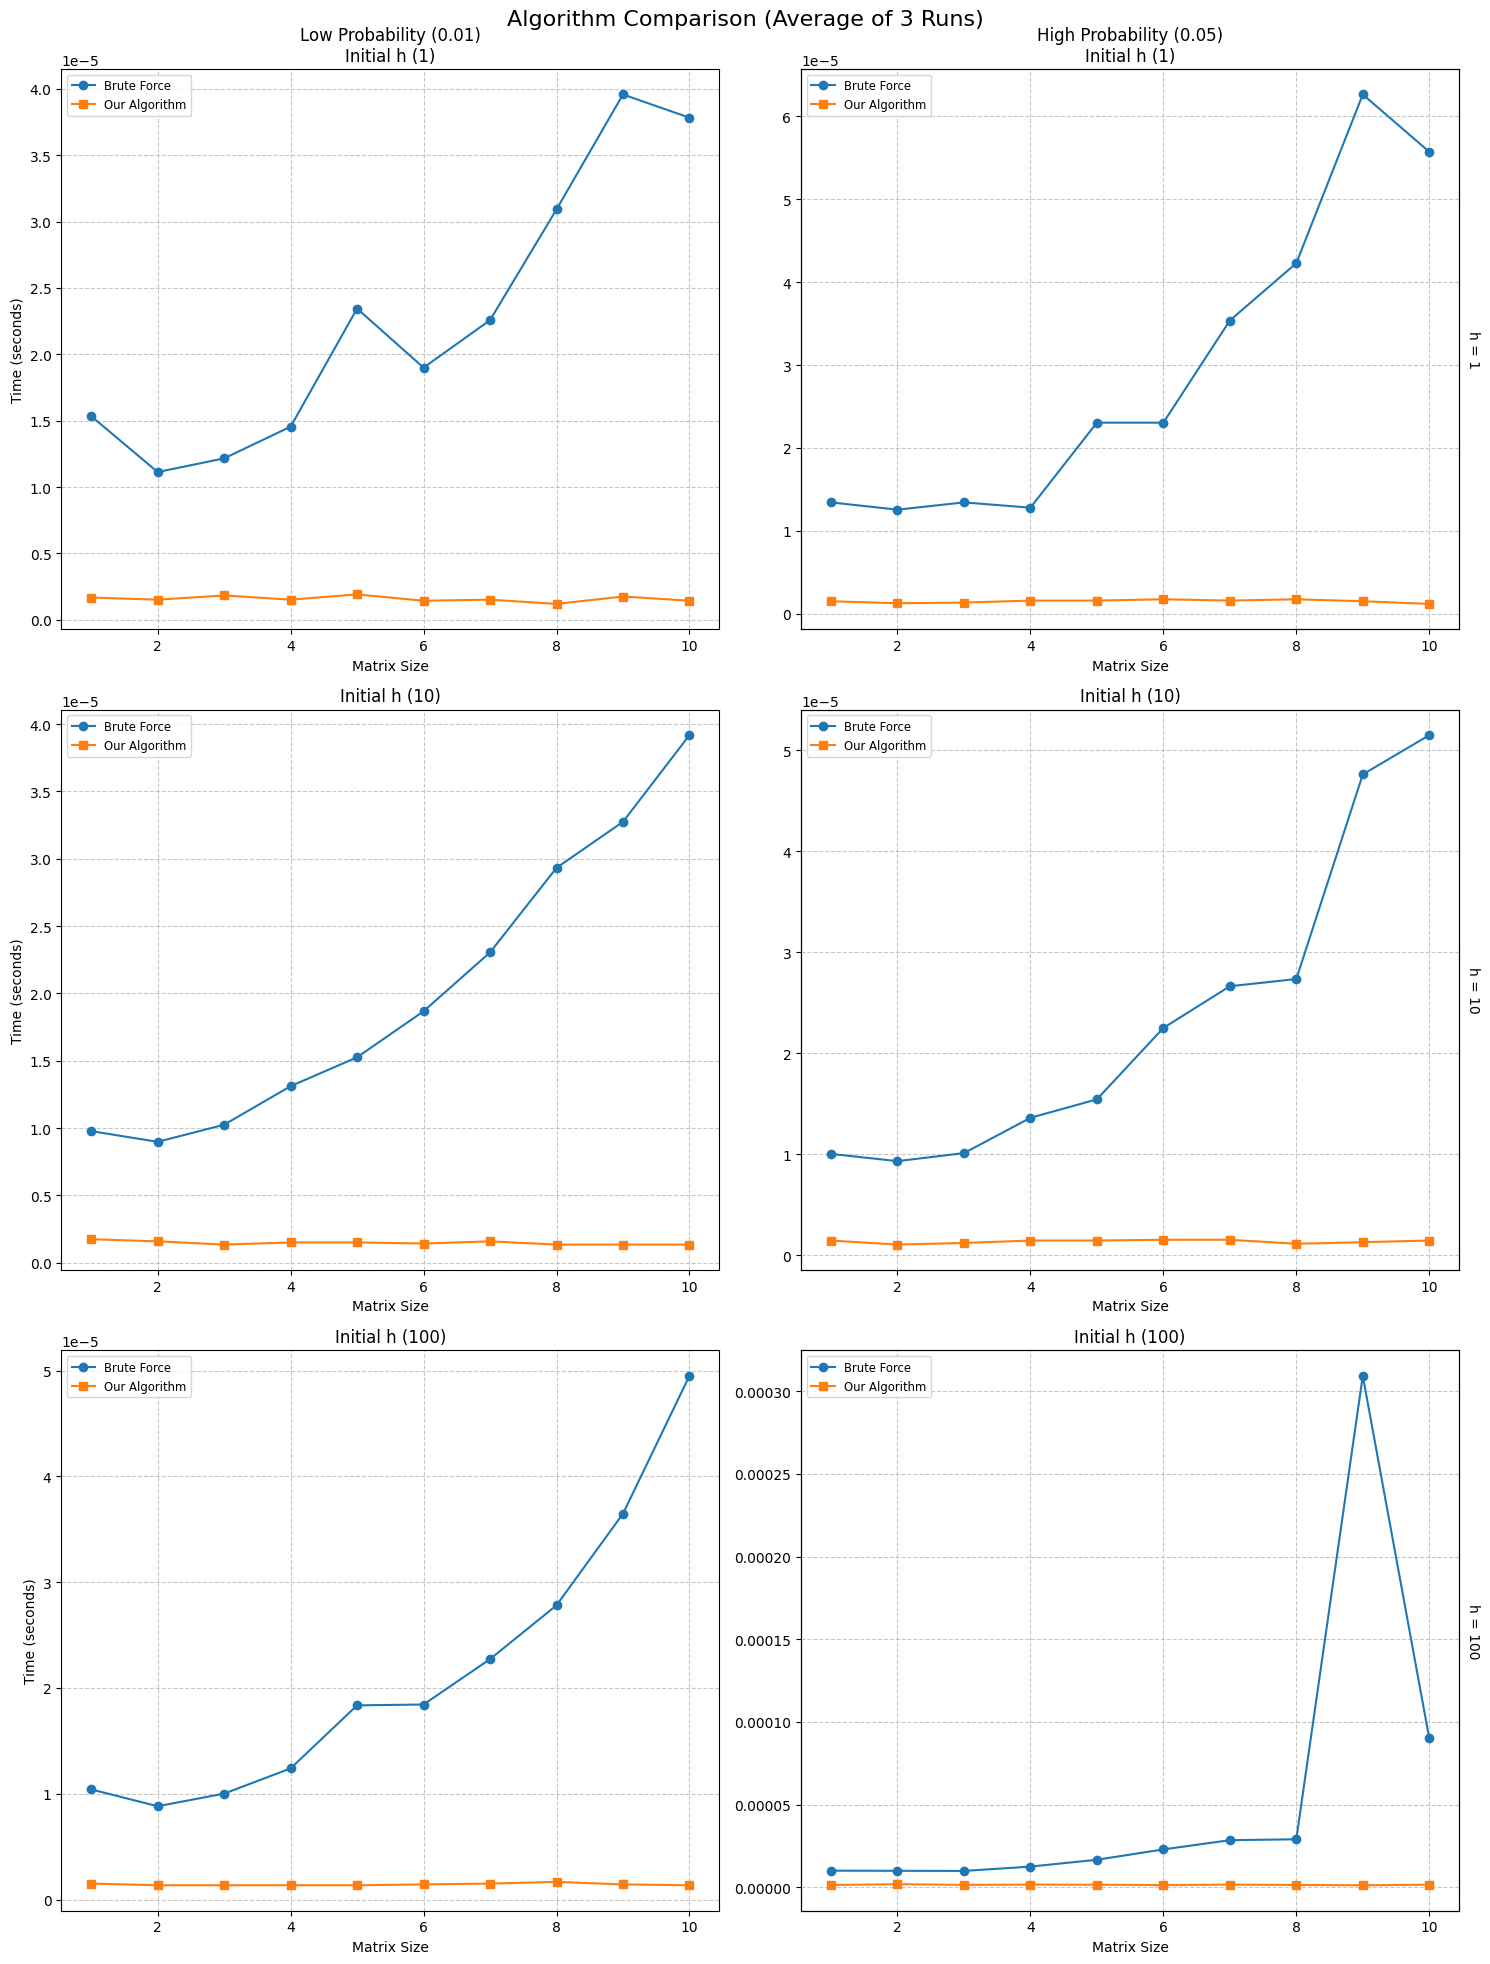

In [17]:
compare_algorithm(algo_brute_p3, algo_p3, problem_id=3, num_experiments=3)

In [18]:
'''visualize p4
'''

import random

def generate_random_missions_and_resources(num_missions=5, max_resources=10, max_reward=5):
    """
    Generate random missions and player resources for testing.
    
    num_missions: Number of missions to generate
    max_resources: Maximum number of resources a player can have
    max_reward: Maximum reward a mission can give
    
    Returns:
    - missions: List of randomly generated missions
    - player_resources: List of player's current resources [apple, stones, grass]
    """
    # Generate random resources for the player
    
    # Generate random missions
    missions = []
    for _ in range(num_missions):
        required_apple = random.randint(0, max_resources)
        required_stones = random.randint(0, max_resources)
        required_grass = random.randint(0, max_resources)
        reward = random.randint(1, max_reward)  # Reward can be any value from 1 to max_reward
        missions.append([required_apple, required_stones, required_grass, reward])
    
    player_resource_size = num_missions * max_resources
    player_resources = [random.randint(max_resources//100, max_resources) for _ in range(3)]  # [apple, stones, grass]

    return missions, player_resources


# Example usage
missions, player_resources = generate_random_missions_and_resources()
print("Generated Missions:", missions)
print("Player Resources:", player_resources)


Generated Missions: [[10, 7, 7, 5], [6, 10, 6, 3], [5, 4, 3, 1], [5, 10, 1, 4], [3, 7, 3, 3]]
Player Resources: [7, 3, 1]


In [19]:
from p4 import algo_p4, brute_force_p4
brute_force_p4(missions, player_resources)

0

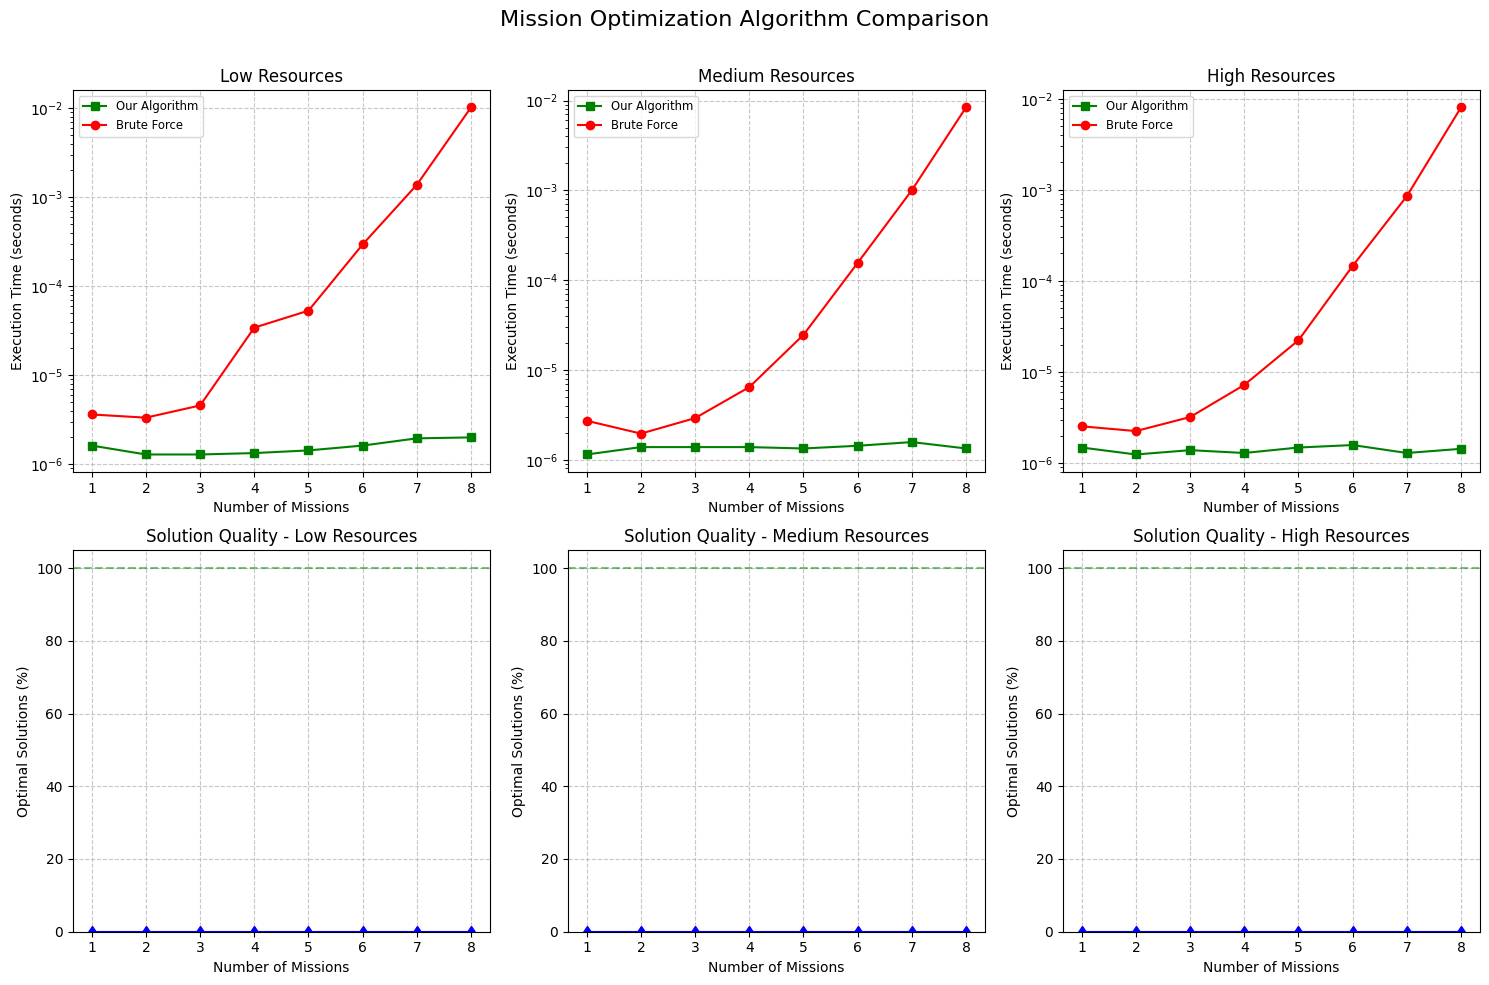

In [25]:
def compare_mission_algorithms(num_trials=5):
    # Parameters to vary in our experiments
    mission_counts = range(1,9)
    resource_settings = [
        (5, "Low"),
        (10, "Medium"),
        (20, "High")
    ]
    
    # Create one large figure
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 3, figure=fig)
    
    # Top row: Execution time comparison
    # Bottom row: Solution quality comparison (optimal solution %)
    
    # For each resource setting (columns)
    for col, (max_resource, resource_label) in enumerate(resource_settings):
        brute_times = []
        algo_times = []
        
        # For tracking solution quality
        optimal_percentage = []
        
        # For each mission count
        for mission_count in mission_counts:
            brute_time_sum = 0
            algo_time_sum = 0
            optimal_count = 0
            
            # Run multiple trials
            for _ in range(num_trials):
                # # Skip if factorial would be too large
                # if mission_count > 10:  # 11! is already over 39 million
                #     missions, resources = generate_random_missions_and_resources(
                #         num_missions=mission_count,
                #         max_resources=max_resource,
                #         max_reward=max_resource
                #     )
                    
                #     # Only time the algorithm
                #     start_time = time.time()
                #     algo_result = algo_p4(missions, resources.copy())
                #     algo_time = time.time() - start_time
                    
                #     algo_time_sum += algo_time
                #     brute_time_sum = None  # Mark as not computed
                #     optimal_count = None   # Can't determine optimality
                # else:
                    missions, resources = generate_random_missions_and_resources(
                        num_missions=mission_count,
                        max_resources=max_resource,
                        max_reward=max_resource
                    )
                    
                    # Time both algorithms
                    start_time = time.time()
                    brute_result = brute_force_p4(missions, resources.copy())
                    brute_time = time.time() - start_time
                    
                    start_time = time.time()
                    algo_result = algo_p4(missions, resources.copy())
                    algo_time = time.time() - start_time
                    
                    brute_time_sum += brute_time
                    algo_time_sum += algo_time
                    
                    # Check if algorithm found optimal solution
                    if algo_result == brute_result:
                        optimal_count += 1
            
            # Average the times
            if brute_time_sum is not None:
                brute_times.append(brute_time_sum / num_trials)
            else:
                brute_times.append(None)
                
            algo_times.append(algo_time_sum / num_trials)
            
            # Calculate percentage of optimal solutions
            if optimal_count is not None:
                optimal_percentage.append((optimal_count / num_trials) * 100)
            else:
                optimal_percentage.append(None)
        
        # Plot execution time (top row)
        ax_time = fig.add_subplot(gs[0, col])
        
        # Plot algorithm time for all mission counts
        ax_time.plot(mission_counts, algo_times, 's-', color='green', label='Our Algorithm')
        
        # Plot brute force only where we have data
        valid_indices = [i for i, t in enumerate(brute_times) if t is not None]
        if valid_indices:
            valid_mission_counts = [mission_counts[i] for i in valid_indices]
            valid_brute_times = [brute_times[i] for i in valid_indices]
            ax_time.plot(valid_mission_counts, valid_brute_times, 'o-', color='red', label='Brute Force')
        
        ax_time.set_xlabel('Number of Missions')
        ax_time.set_ylabel('Execution Time (seconds)')
        ax_time.set_title(f'{resource_label} Resources')
        ax_time.set_yscale('log')  # Log scale for time differences
        ax_time.legend(loc='upper left', fontsize='small')
        ax_time.grid(True, linestyle='--', alpha=0.7)
        
        # Plot optimality (bottom row)
        ax_opt = fig.add_subplot(gs[1, col])
        
        # Plot optimal percentage only where we have data
        valid_indices = [i for i, p in enumerate(optimal_percentage) if p is not None]
        if valid_indices:
            valid_mission_counts = [mission_counts[i] for i in valid_indices]
            valid_optimal_percentage = [optimal_percentage[i] for i in valid_indices]
            ax_opt.plot(valid_mission_counts, valid_optimal_percentage, 'd-', color='blue')
            ax_opt.axhline(y=100, color='green', linestyle='--', alpha=0.5, label='Optimal (100%)')
        
        ax_opt.set_xlabel('Number of Missions')
        ax_opt.set_ylabel('Optimal Solutions (%)')
        ax_opt.set_title(f'Solution Quality - {resource_label} Resources')
        ax_opt.set_ylim(0, 105)  # 0-100% with a little margin
        ax_opt.grid(True, linestyle='--', alpha=0.7)
    
    plt.suptitle("Mission Optimization Algorithm Comparison", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Run the comparison
compare_mission_algorithms()